In [ ]:
# This notebook is done as per my understanding of Lecture 4 of CS229, 2019

#import libraries
import numpy as np # for matrices and vectors
import matplotlib.pyplot as plt # for plots and figures

%matplotlib inline


### Linear Regression:

Given any training data, the goal of Machine Learning is to learn a hypothesis using an learning algorithm such that, $h_{\theta}(X) \approx y$.

Linear Regression is a subset of family of hypotheses such that the hypothesis function is defined by $h_{\theta}(X) = X\theta$

#### Defining Hypotheses:

Given, $X \in \mathbb{R}^{n \times (d+1)} , y \in \mathbb{R} ^ n$, the hypothesis function is given by,

$$ h_{\theta}(X) = X\theta \\ X \in \mathbb{R}^{n \times (d+1)} \\ y \in \mathbb{R}^{n}$$

### Parameters:

$$\theta \in \mathbb{R}^{d+1}$$

### Loss Function for best fit:
$$ L(h_\theta(X),y) = \frac{1}{2}(h_\theta(X)-y)^T(h_\theta(X)-y)$$

### Estimation of Parameters using MLE

Machine Learning uses statistics to predict the parameters with given data and predicts the output variable by using the probability techniques.

parameters at minimized loss function can be estimated by Maximum Likelihood function which goes in this way.


The Loss function in cartesian form given by,

$$
L(y,\hat{y}) = \frac{1}{2n}\sum\limits_{i=1}^{n}(y-\hat{y}_{i})^2
= \frac{1}{2n}(h_\theta(X)-y)^T(h_\theta(X)-y)$$
where $\hat{y}_i$ is the prediction for $x^{(i)}$


In [ ]:
np.random.seed(42)
n = 1000 # number of examples
d = 50  # number of features

X = np.abs(np.random.randn(n,d))
y = np.abs(np.random.randn(n,1))


#creation of design matrix
x0 = np.ones((n,1),dtype=float)

assert x0.shape == (n,1)

assert X.shape == (n,d)

X = np.hstack((x0,X))

In [ ]:
theta = np.random.randn(d,1)
theta = np.vstack((np.zeros((1,1),dtype=float),theta))
print(theta.shape)

(51, 1)


In [ ]:
print(f"""
Design Matrix Shape: {X.shape}
Target Value Shape: {y.shape}
Parameters Shape: {theta.shape}
""")


Design Matrix Shape: (1000, 51)
Target Value Shape: (1000, 1)
Parameters Shape: (51, 1)



array([[0.163303]])

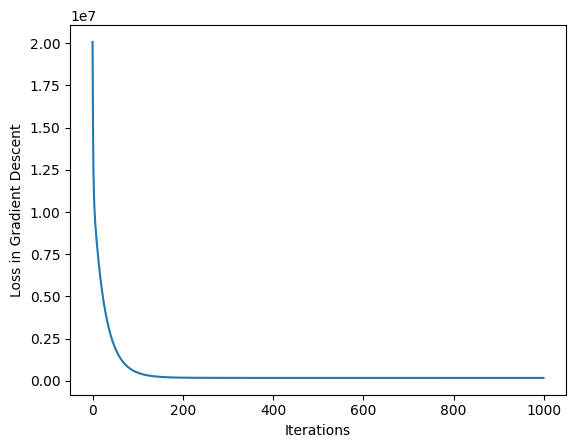

In [ ]:
# After Defining Theta, X and y

class LinearRegression:
  def __init__(self,X,y,theta,num_iter,plot_loss = True):
    """
    Constructor Function: Initializes all the functions

    Arguments:

    X: Design Matrix
    y: Target / Output Vector
    theta: parameter vector
    num_iter: Number of Iterations
    plot_loss: Default True, plots loss values

    Also contains,

    epsilon: convergence criteria of Gradient Descent
    learning_rate: step length in Gradient Descent


    """
    self.X = X
    self.y = y
    self.theta = theta
    self.learning_rate = 0.05
    self.num_iter = num_iter
    self.epsilon = 1e-5
  def compute_loss(self):
    """
    Calculates the squared error with given X and y

    """
    #Absolute Loss
    abs_loss = np.dot(self.X,self.theta)-self.y
    #Root Mean Squared Loss
    squared_loss = (1/2*(self.X.shape[0]))*np.dot(abs_loss.T,abs_loss)
    return np.squeeze(squared_loss)
  def gradient_descent(self):
    """
    Performs Gradient Descent Algorithm and updates the parameters
    """
    loss = self.compute_loss()
    n = self.X.shape[0]
    loss_ = []
    loss_.append(loss)
    for i in range(1,self.num_iter):
      #to assert the shapes
      assert np.dot(self.X,self.theta).shape == y.shape
      # computing the gradient
      gradient = np.dot(self.X.T,(np.dot(self.X,self.theta)-y))
      #updating the parameters in a direction of negative gradient, which tries to minimize loss
      self.theta = self.theta - (self.learning_rate/n)*gradient
      #computing loss with updated weight
      loss = self.compute_loss()
      #appending the loss to loss_ list, which can used to plot the loss curve during training
      loss_.append(loss)
    return loss_
  def fit(self,x_test,sgd=False):
    """
    Predict target value for a given input point in d+1 dimensional space
    """
    if sgd:
      loss_ = self.stochastic_gradient_descent()
    loss_ = self.gradient_descent()
    y_pred = np.dot(x_test.T,self.theta)
    plt.plot(loss_)
    plt.xlabel("Iterations")
    if sgd:
      optimizer =  "Stochastic Gradiet Descent"
    else:
      optimizer = "Gradient Descent"
    plt.ylabel(f"Loss in {optimizer}")
    return y_pred
    pass
  def fit_normal(self,x_test):
    """
    Predict parameters as per Normal Equation of parameters
    """
    #computing (X^TX)^-1
    inv_ = np.linalg.inv(np.dot(self.X.T,self.X))
    self.theta = np.dot(inv_,np.dot(X.T,y))
    y_pred = np.dot(x_test.T,self.theta)
    return y_pred
  def stochastic_gradient_descent(self):
    n = self.X.shape[0]
    loss_sgd = []
    for _ in range(self.num_iter):
      k = np.random.randint(0,n,1)
      x_k = self.X[k].reshape(1,-1)
      loss = (1/(2*n))*((np.dot(x_k,self.theta) - y[k])**2)
      gradient = (np.dot(x_k,self.theta) - y[k])*(self.X[k])
      self.theta = self.theta - (self.learning_rate/n)*(gradient.reshape(-1,1))
      loss_sgd.append(np.squeeze(loss))
    # print(loss_sgd[:5])
    # plt.plot(loss_sgd)

lin_reg = LinearRegression(X,y,theta,1000)
np.random.seed(42)
x_test = np.vstack((np.ones((1,1)),np.random.randn(d,1)))
y_pred = lin_reg.fit(x_test)
y_pred

In [ ]:
y_pred_normal = lin_reg.fit_normal(x_test)
y_pred_normal

array([[0.90899593]])

array([[0.90886307]])

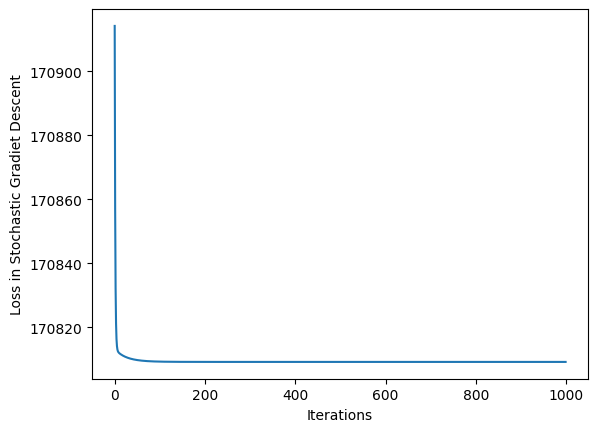

In [ ]:
y_pred_sgd = lin_reg.fit(x_test,sgd = True)
y_pred_sgd

In [ ]:
x_test.shape

(51, 1)

In [ ]:
# prediction using scikit-learn

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred_scikit_lr = lr.predict(x_test.T)
y_pred_scikit_lr

array([[0.90917969]])